## Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from pmdarima import auto_arima

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Functions

In [2]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('Regression Forecast for the Last 24 Observations')
    plt.xlabel('Time')
    plt.ylabel('ASIALNG Price')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

## Import Data

In [3]:
df = pd.read_excel("Renamed Columns Stationary Data/ASIALNG.xlsx") 
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,ASIALNG,ASIALNG_LAG1,ASIALNG_LAG2,ASIALNG_LAG3,ASIALNG_LAG4,USAGDP,Equity Market Volatility,3 Month Treasury Bill,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,,,,,,
1996-07-01,0.002621,0.023906,0.081163,0.000000,-0.099806,0.020675,-4.19,0.09,-0.196710,0,0
1996-10-01,0.109019,0.002621,0.023906,0.081163,0.000000,0.012196,1.94,0.08,0.083382,0,0
1997-01-01,0.002345,0.109019,0.002621,0.023906,0.081163,0.015662,-0.40,-0.12,-0.446287,0,0
1997-04-01,-0.143281,0.002345,0.109019,0.002621,0.023906,0.012380,2.70,0.08,0.782759,0,0
1997-07-01,-0.061301,-0.143281,0.002345,0.109019,0.002621,0.018502,-0.41,-0.01,0.041964,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,0.553581,-0.148651,-0.112020,0.644932,0.604677,0.020373,-0.43,0.77,-0.083527,1,1
2022-10-01,-0.491094,0.553581,-0.148651,-0.112020,0.644932,0.017477,-3.25,1.58,-0.269102,1,1
2023-01-01,-0.538396,-0.491094,0.553581,-0.148651,-0.112020,0.015792,1.58,1.38,0.005921,1,1


## Test Importance

In [4]:
y = df['ASIALNG']
X = df[["ASIALNG_LAG1","ASIALNG_LAG2","ASIALNG_LAG3","ASIALNG_LAG4","USAGDP","Equity Market Volatility","3 Month Treasury Bill","Infectious Disease Tracker","COV19","RUWAR"]]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ASIALNG   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     7.533
Date:                Sat, 20 Jan 2024   Prob (F-statistic):           8.53e-09
Time:                        12:25:36   Log-Likelihood:                 40.049
No. Observations:                 109   AIC:                            -58.10
Df Residuals:                      98   BIC:                            -28.49
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0131      0.025     -0.532      0.596      -0.062       0.036
ASIALNG_LAG1                   0.2419      0.108      2.239      0.027       0.027       0.456
ASIALNG_LAG2                  -0.3949      0.102     -3.869      0.000      -0.597      -0.192
ASIALNG_LAG3                   0.2398      0.098      2.458      0.016       0.046       0.433
ASIALNG_LAG4                   0.1353      0.102      1.326      0.188      -0.067       0.338
USAGDP                         1.0055      1.509      0.666      0.507      -1.988       3.999
Equity Market Volatility      -0.0036      0.003     -1.144      0.255      -0.010       0.003
3 Month Treasury Bill         -0.0157      0.050     -0.314      0.754      -0.115       0.083
Infectious Disease Tracker    -0.0611      0.039     -1.566      0.121      -0.138       0.016
COV19                          0.2627      0.072      3.626      0.000       0.119       0.407
RUWAR                         -0.4447      0.120     -3.694      0.000      -0.684      -0.206
==============================================================================
Omnibus:                       12.048   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.317
Skew:                          -0.594   Prob(JB):                     0.000472
Kurtosis:                       4.401   Cond. No.                         585.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Prune Dataset

In [5]:
selected_columns = ["ASIALNG","ASIALNG_LAG1","ASIALNG_LAG2","ASIALNG_LAG3","Infectious Disease Tracker","COV19","RUWAR"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,ASIALNG,ASIALNG_LAG1,ASIALNG_LAG2,ASIALNG_LAG3,Infectious Disease Tracker,COV19,RUWAR
DATE,,,,,,,
1996-07-01,0.002621,0.023906,0.081163,0.000000,-0.196710,0,0
1996-10-01,0.109019,0.002621,0.023906,0.081163,0.083382,0,0
1997-01-01,0.002345,0.109019,0.002621,0.023906,-0.446287,0,0
1997-04-01,-0.143281,0.002345,0.109019,0.002621,0.782759,0,0
1997-07-01,-0.061301,-0.143281,0.002345,0.109019,0.041964,0,0
...,...,...,...,...,...,...,...
2022-07-01,0.553581,-0.148651,-0.112020,0.644932,-0.083527,1,1
2022-10-01,-0.491094,0.553581,-0.148651,-0.112020,-0.269102,1,1
2023-01-01,-0.538396,-0.491094,0.553581,-0.148651,0.005921,1,1


## Simple Regressor

In [6]:
train = pruned_df[:-8]
test = pruned_df[-8:]

X_train = train[['ASIALNG_LAG1']]
y_train = train['ASIALNG']

X_test = test[['ASIALNG_LAG1']]
y_test = test['ASIALNG']

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the regression model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ASIALNG   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     7.780
Date:                Sat, 20 Jan 2024   Prob (F-statistic):            0.00634
Time:                        12:25:40   Log-Likelihood:                 24.827
No. Observations:                 101   AIC:                            -45.65
Df Residuals:                      99   BIC:                            -40.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0128      0.019      0.670      0.505      -0.025       0.051
ASIALNG_LAG1     0.2829      0.101      2.789      0.006       0.082       0.484
==============================================================================
Omnibus:                       21.799   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.067
Skew:                           0.690   Prob(JB):                     9.05e-14
Kurtosis:                       6.517   Cond. No.                         5.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

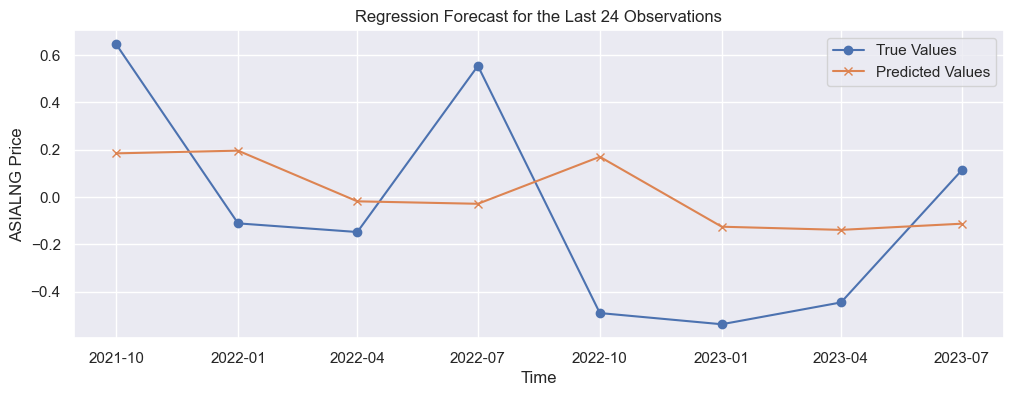

In [7]:
# Make predictions
predictions = model.predict(X_test)

plotFor(y_test,predictions)

In [8]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.3857
MAPE: 127.4703 %
MSE: 0.1768
RMSE: 0.4205


### Save

In [15]:
df = pd.DataFrame({'ASIALNG Q UR': predictions, 'Actual': y_test})
df.to_excel("ASIALNG_Q_UR_forecast.xlsx", index=True)
df

,ASIALNG Q UR,Actual
DATE,,
2021-10-01,0.183836,0.644932
2022-01-01,0.195225,-0.112020
2022-04-01,-0.018937,-0.148651
2022-07-01,-0.029301,0.553581
2022-10-01,0.169380,-0.491094
2023-01-01,-0.126187,-0.538396
2023-04-01,-0.139570,-0.446175
2023-07-01,-0.113478,0.111620


In [16]:
# Open a file in write mode
with open('ASIALNG Q UR Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')

## Multiple Regressor

In [9]:
train = pruned_df[:-8]
test = pruned_df[-8:]

X_train = train[["ASIALNG_LAG1","ASIALNG_LAG2","ASIALNG_LAG3","COV19","RUWAR"]]
y_train = train['ASIALNG']

X_test = test[["ASIALNG_LAG1","ASIALNG_LAG2","ASIALNG_LAG3","COV19","RUWAR"]]
y_test = test['ASIALNG']

#X_train = sm.add_constant(X_train)
#X_test = sm.add_constant(X_test)

# Fit the regression model
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                ASIALNG   R-squared (uncentered):                   0.437
Model:                            OLS   Adj. R-squared (uncentered):              0.414
Method:                 Least Squares   F-statistic:                              18.83
Date:                Sat, 20 Jan 2024   Prob (F-statistic):                    1.75e-11
Time:                        12:25:48   Log-Likelihood:                          49.708
No. Observations:                 101   AIC:                                     -91.42
Df Residuals:                      97   BIC:                                     -80.95
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
ASIALNG_LAG1     0.5778      0.096      6.010      0.000       0.387       0.769
ASIALNG_LAG2    -0.6492      0.096     -6.746      0.000      -0.840      -0.458
ASIALNG_LAG3     0.4180      0.098      4.253      0.000       0.223       0.613
COV19            0.2733      0.063      4.318      0.000       0.148       0.399
RUWAR                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                       10.584   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.672
Skew:                          -0.729   Prob(JB):                      0.00481
Kurtosis:                       3.639   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

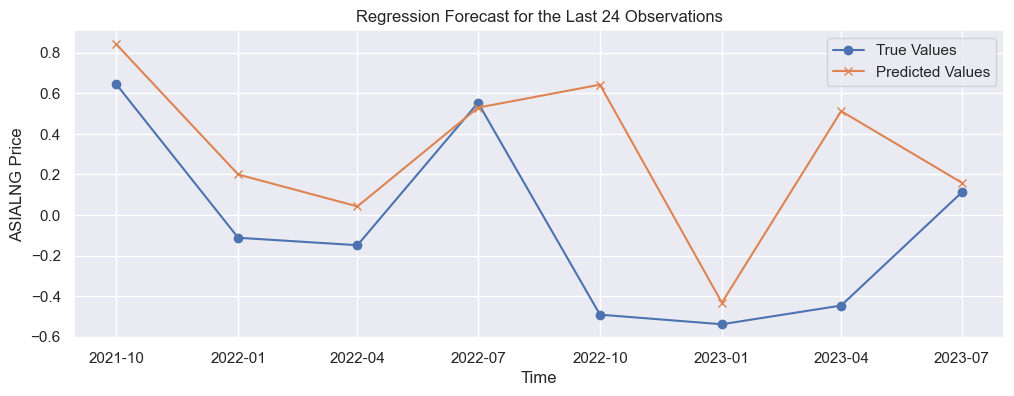

In [10]:
# Make predictions
predictions = model.predict(X_test)

plotFor(y_test,predictions)

In [21]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.3714
MAPE: 118.8345 %
MSE: 0.2989
RMSE: 0.5468


### Save

In [22]:
df = pd.DataFrame({'ASIALNG Q MR': predictions, 'Actual': y_test})
df.to_excel("ASIALNG_Q_MR_forecast.xlsx", index=True)
df

,ASIALNG Q MR,Actual
DATE,,
2021-10-01,0.842082,0.644932
2022-01-01,0.199963,-0.112020
2022-04-01,0.042619,-0.148651
2022-07-01,0.529657,0.553581
2022-10-01,0.642786,-0.491094
2023-01-01,-0.431949,-0.538396
2023-04-01,0.512376,-0.446175
2023-07-01,0.159740,0.111620


In [23]:
# Open a file in write mode
with open('ASIALNG Q MR Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')